<a href="https://colab.research.google.com/github/Luseat/Prediksi-BTC-USD/blob/main/Prediksi_BTC_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Liblary**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error
import yfinance as yf
import seaborn as sns
import matplotlib.dates as mdates

**Import Data**

In [7]:
start_date = "2018-01-01"
end_date = "2025-02-26" # 2024-12-22

data = yf.Ticker("BTC-USD")
data = data.history(start=start_date, end=end_date)
del data["Dividends"]
del data["Stock Splits"]
forecastData = data.copy()
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2025-02-21 00:00:00+00:00,98340.671875,99497.968750,94852.960938,96125.546875,49608706470
2025-02-22 00:00:00+00:00,96134.203125,96950.156250,95765.343750,96577.757812,18353824477
2025-02-23 00:00:00+00:00,96577.804688,96671.875000,95270.453125,96273.921875,16999478976
2025-02-24 00:00:00+00:00,96277.960938,96503.453125,91371.742188,91418.171875,44046480529
2025-02-25 00:00:00+00:00,91437.117188,92511.078125,86008.234375,88736.171875,92139104128


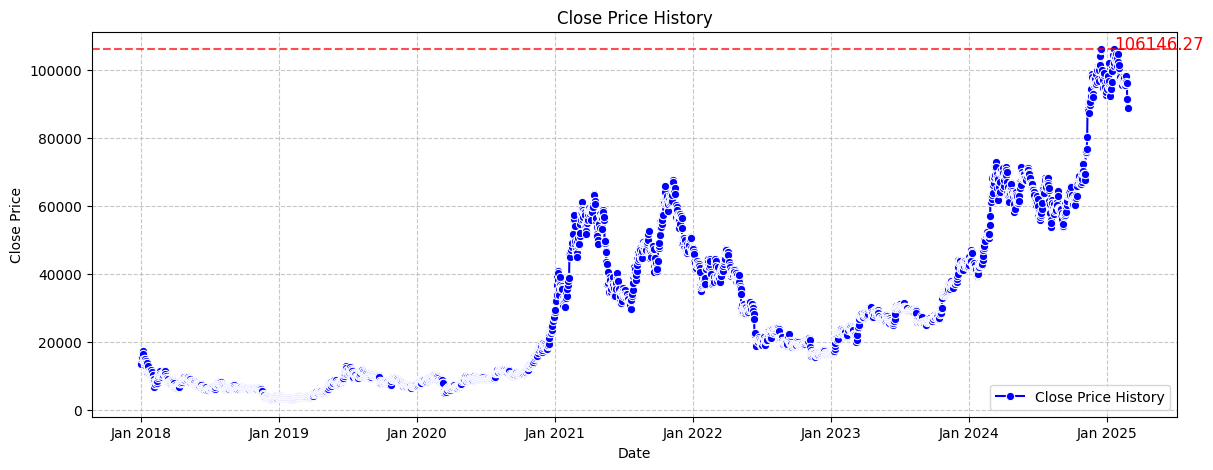

In [9]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=data, x=data.index, y='Close', label='Close Price History', marker='o', color='blue')

max_price = data['Close'].max()
max_price_date = data['Close'].idxmax()

# Annotate the highest price
plt.annotate(f'{max_price:.2f}',
             xy=(max_price_date, max_price),
             xytext = (max_price_date, max_price + 2),
             fontsize=12, color='red')
plt.axhline(max_price, linestyle='--', color='red', alpha=0.7)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Preprocesing**

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
scaled_data

array([[0.10125827],
       [0.11413268],
       [0.1162598 ],
       ...,
       [0.90406772],
       [0.85688306],
       [0.83082132]])

In [11]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        labels.append(data[i + sequence_length, 0])
    return np.array(sequences), np.array(labels)

In [12]:
sequence_lenght = 60 #60 hari kedepan #xX yY

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

X_train, y_train = create_sequences(train_data, sequence_lenght)
X_test, y_test = create_sequences(test_data, sequence_lenght)

**Training Data**

In [13]:
model = Sequential()

# Layer pertama
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#Layer kedua
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# layer Dense
model.add(Dense(units=25))
model.add(Dense(units=1))


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=70, batch_size=84, validation_data=(X_test, y_test))

Epoch 1/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0202 - val_loss: 0.0067
Epoch 2/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0019 - val_loss: 0.0047
Epoch 3/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 4/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 5/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 6/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 7/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 7.8775e-04 - val_loss: 0.0020
Epoch 8/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 8.2357e-04 - val_loss: 0.0027
Epoch 9/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 7.3368e-04 - val_loss: 0.0018
Epoch 10/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 7.1219e-04 - val_loss: 0.0012
Epoch 11/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 7.0518e-04 - val_loss: 0.0026
Epoch 12/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 7

**Evaluasi Model**

In [15]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
mse = mean_squared_error(y_test_scaled, predictions)
print(f'Mean Squared Error: {mse}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Mean Squared Error: 5712052.1257227


**Harga Prediksi dan Harga Sebenarnya**

In [18]:
last_60_days = data['Close'][-sequence_lenght:].values.reshape(-1, 1)
last_60_days_scaled = scaler.transform(last_60_days)

X_predict = []
X_predict.append(last_60_days_scaled)

X_predict = np.array(X_predict)
X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))
predicted_price = model.predict(X_predict)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Prediksi Harga Untuk Bitcoin Selanjutnya: {predicted_price[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediksi Harga Untuk Bitcoin Selanjutnya: 90970.140625


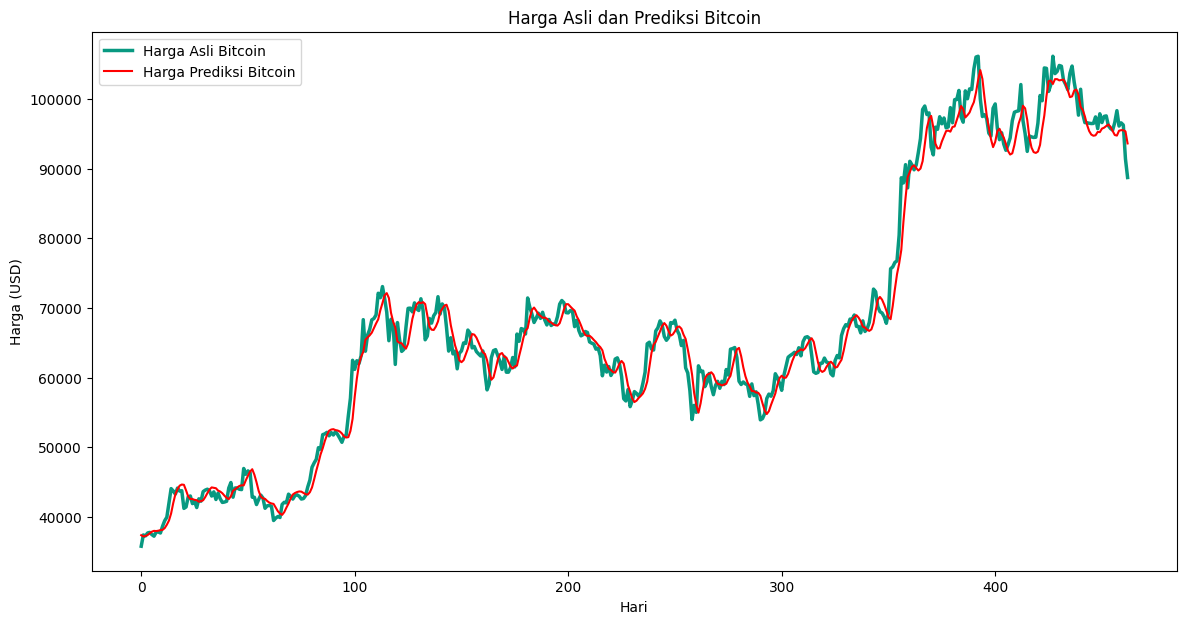

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='Harga Asli Bitcoin', color='#089981', linewidth=2.5 )
plt.plot(predictions, label='Harga Prediksi Bitcoin', color='red', linewidth=1.5 )

plt.title('Harga Asli dan Prediksi Bitcoin')
plt.xlabel('Hari')
plt.ylabel('Harga (USD)')
plt.legend()
plt.show()

**Prediksi Harga Bitcoin Masa Depan**

In [20]:
future_days = 60

last_60_days = data['Close'][-sequence_lenght:].values.reshape(-1, 1)
last_60_days_scaled = scaler.transform(last_60_days)
future_predictions = []

for i in range(future_days):
    X_predict = []
    X_predict.append(last_60_days_scaled)
    X_predict = np.array(X_predict)
    X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))

    predicted_price = model.predict(X_predict)
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)

    future_predictions.append(predicted_price_unscaled[0, 0])

    new_scaled_data = np.append(last_60_days_scaled[1:], predicted_price)
    last_60_days_scaled = new_scaled_data.reshape(-1, 1)

future_dates = pd.date_range(start=data.index[-1], periods=future_days + 1, freq='D')[1:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

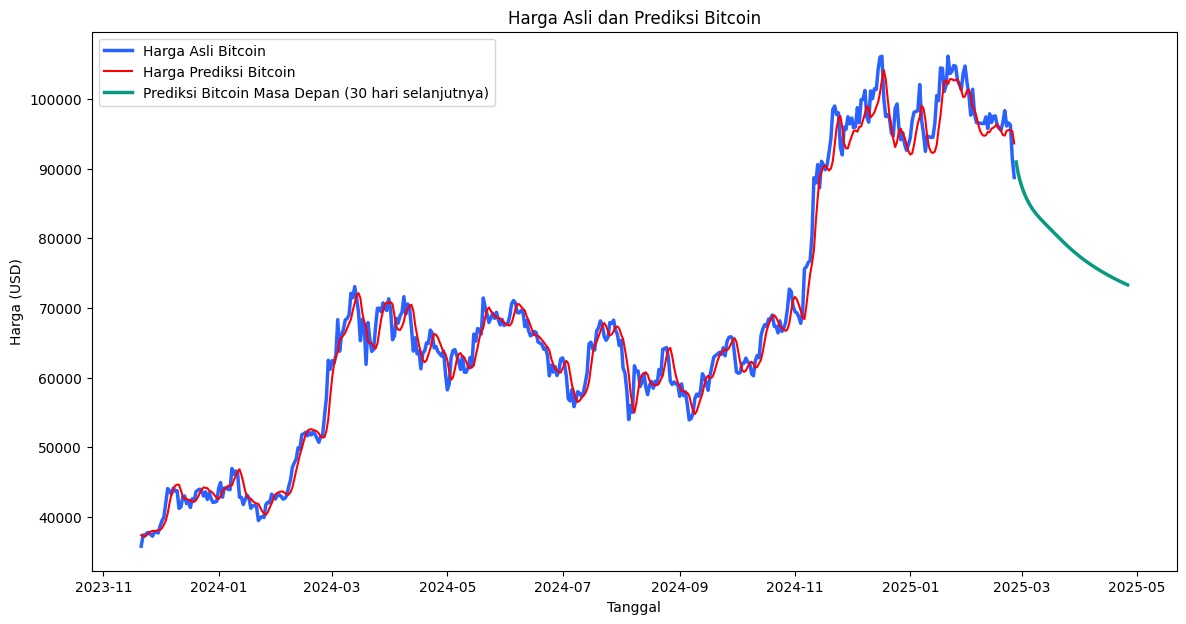

In [21]:
plt.figure(figsize=(14, 7))

plt.plot(data.index[-len(y_test_scaled):], y_test_scaled, label='Harga Asli Bitcoin', color='#2962ff', linewidth=2.5)
plt.plot(data.index[-len(y_test_scaled):], predictions, label='Harga Prediksi Bitcoin', color='red', linewidth=1.5)
plt.plot(future_dates, future_predictions, label='Prediksi Bitcoin Masa Depan (30 hari selanjutnya)', color='#089981', linewidth=2.5)

plt.title('Harga Asli dan Prediksi Bitcoin')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()
plt.show()

In [22]:
future_predictions_df = pd.DataFrame({'Tanggal': future_dates, 'Harga Prediksi Bitcoin': future_predictions})
future_predictions_df

,Tanggal,Harga Prediksi Bitcoin
0,2025-02-26 00:00:00+00:00,90970.140625
1,2025-02-27 00:00:00+00:00,89448.343750
2,2025-02-28 00:00:00+00:00,88343.328125
3,2025-03-01 00:00:00+00:00,87451.789062
4,2025-03-02 00:00:00+00:00,86694.054688
5,2025-03-03 00:00:00+00:00,86035.765625
6,2025-03-04 00:00:00+00:00,85458.578125
7,2025-03-05 00:00:00+00:00,84949.656250
8,2025-03-06 00:00:00+00:00,84498.039062
9,2025-03-07 00:00:00+00:00,84093.585938
